In [15]:
def global_multiLabel_confusion_matrix(y_test_g,y_est_g):
    n_samples, n_class = y_test_g.shape
    CM = np.zeros((n_class,n_class))
    
    def acum_CM(y_test,y_est,CM):
        ind_real = np.asarray(y_test > 0).nonzero()[0]
        ind_est = np.asarray(y_est > 0).nonzero()[0]
        #--------------------------------
        mesh_real = np.array(np.meshgrid(ind_real,ind_real))
        comb_real = mesh_real.T.reshape(-1, 2)
        ind_remove_real = comb_real[:,0] != comb_real[:,1]
        comb_real = comb_real[ind_remove_real]
        #--------------------------------
        mesh_est = np.array(np.meshgrid(ind_real,ind_est))
        comb_est = mesh_est.T.reshape(-1, 2)
        #--------------------------------
        comb_real2 = comb_real[:,0] + comb_real[:,1]*1j
        comb_est2 = comb_est[:,0] + comb_est[:,1]*1j
        ind_remove = np.in1d(comb_est2,comb_real2)
        comb_est = comb_est[np.logical_not(ind_remove)]
        #--------------------------------
        CM[comb_est[:,0],comb_est[:,1]] += 1
        return CM
    
    for i in range(n_samples):
        CM = acum_CM(y_test_g[i,:],y_est_g[i,:],CM)
        
    return CM

In [31]:
import numpy as np

#simulated data
y_test_p = np.round(np.random.rand(100,10))
y_est_p = np.round(np.random.rand(100,10))

CM = global_multiLabel_confusion_matrix(y_test_p,y_est_p)

#Normalization to show precision on the diagonal
CM = CM/CM.sum(axis=0)

protein_names = np.arange(10)

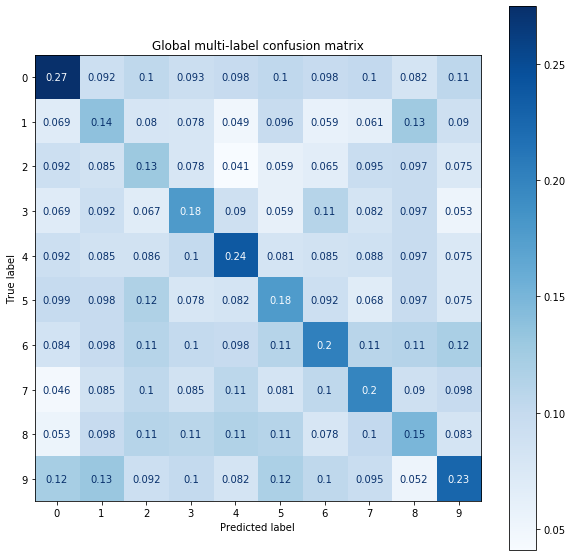

In [40]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

disp = ConfusionMatrixDisplay(confusion_matrix=CM,display_labels=protein_names)
disp.plot(include_values=True,cmap=plt.cm.Blues, ax=ax, xticks_rotation='horizontal',
          values_format=None)
plt.title('Global multi-label confusion matrix')
plt.show()